In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix,accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt


In [18]:
df = pd.read_csv('combined-dataset.csv')
print (df.columns)
df.head(20)

Index(['gold', 'platinum', 'palladium', 'tungsten', 'silver', 'y'], dtype='object')


,gold,platinum,palladium,tungsten,silver,y
0,43520,22464,21397,20007,24313,1
1,43534,22031,21513,19904,24052,1
2,43534,22554,21243,20086,24285,1
3,43588,22347,21179,20285,24279,1
4,75,22583,21516,19634,24203,1
5,23144,21949,20841,20448,24490,1
6,27635,22280,21984,19521,24288,1
7,26400,22167,20833,20764,24113,1
8,27318,23069,21733,19636,24339,1
9,26469,21838,20803,20391,24088,1


In [19]:

X = df.iloc[:,:5].values
Y = df.iloc[:,5:6].values
scaler = MinMaxScaler()
X = scaler.fit_transform(X)


X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.4,random_state = 42)

In [20]:
print('The shape of our features is:', df.shape)
df.describe()


The shape of our features is: (233700, 6)


,gold,platinum,palladium,tungsten,silver,y
count,233700.000000,233700.000000,233700.000000,233700.000000,233700.000000,233700.000000
mean,24367.802991,21456.918691,21370.395156,21985.624801,22753.481292,6.289474
std,3265.435261,2466.196488,1429.601283,2787.012963,4634.859332,3.912928
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,22796.000000,21127.000000,21133.000000,20822.000000,21915.000000,3.000000
50%,23543.000000,21611.000000,21522.000000,22834.000000,22543.000000,6.000000
75%,25144.000000,22135.000000,21806.000000,23404.000000,23542.000000,10.000000
max,44200.000000,44112.000000,44069.000000,44359.000000,44571.000000,13.000000


In [21]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=190)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train.ravel())
y_pred=clf.predict(X_test)

In [22]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Confusion matrix",confusion_matrix(y_test, y_pred))
print("Confusion matrix",classification_report(y_test, y_pred))


Accuracy: 0.7251176722293539
Confusion matrix [[11612   471  1056   145   296   103    28   412   808   181     7   138
    235]
 [  664  3473     0    81   996    49     0   716   855    11     0    38
    406]
 [  709     1  6572     5     5     4    16     1     3     3    16    17
      0]
 [  372   176    15  2093   423   874     7   234   128   180     3   270
     91]
 [  380   950    12   198  4364    73     1   756   377    12     1    18
    212]
 [  222    47    10   516   115  3345     2    43    34   324     1   285
     16]
 [   12     0    15     3     0     0  7225     0     4     8    59     3
      0]
 [  623   783     5   150   879    68     0  3475   923    16     1    50
    349]
 [  581   848     5    42   296    12     1   593  4632    16     4    69
    409]
 [  121     8    11    73     9   133     2    10    14  6135     3   118
      4]
 [    2     0     3     0     0     0    45     0     0     0  4931     6
      0]
 [  201    34    19   235    21   426    

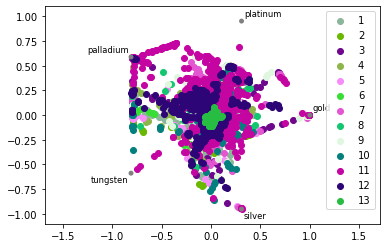

In [24]:
from pandas.plotting import radviz
plt.figure();
radviz(df, "y");